# Data Exploration & Preparation

## Importing Modules

In [1]:
import pandas as pd
import seaborn as sns
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

## Data Exploration

### Data Import 

In [2]:
data = pd.read_csv('raw_data/train.csv')

In [3]:
data.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,target
0,0,A,I,A,B,B,BI,A,S,Q,...,0.759439,0.795549,0.681917,0.621672,0.592184,0.791921,0.815254,0.965006,0.665915,0
1,1,A,I,A,A,E,BI,K,W,AD,...,0.386385,0.541366,0.388982,0.357778,0.600044,0.408701,0.399353,0.927406,0.493729,0
2,2,A,K,A,A,E,BI,A,E,BM,...,0.343255,0.616352,0.793687,0.552877,0.352113,0.388835,0.412303,0.292696,0.549452,0
3,3,A,K,A,C,E,BI,A,Y,AD,...,0.831147,0.807807,0.800032,0.619147,0.221789,0.897617,0.633669,0.760318,0.934242,0
4,4,A,I,G,B,E,BI,C,G,Q,...,0.338818,0.277308,0.610578,0.128291,0.578764,0.279167,0.351103,0.357084,0.328960,1


### X & Y

In [4]:
X = data.drop(columns = 'target')

In [5]:
y = data['target']
y

0         0
1         0
2         0
3         0
4         1
         ..
299995    0
299996    0
299997    1
299998    0
299999    0
Name: target, Length: 300000, dtype: int64

### Checking for duplicates

In [6]:
len(X) # Check number of rows before removing duplicates

300000

In [7]:
X = X.drop_duplicates() # Remove duplicates
len(X)# Check new number of rows

300000

### Null Values

In [8]:
X.isnull().sum().sort_values(ascending=False) #NaN count for each column

id        0
cat15     0
cont9     0
cont8     0
cont7     0
cont6     0
cont5     0
cont4     0
cont3     0
cont2     0
cont1     0
cont0     0
cat18     0
cat17     0
cat16     0
cat14     0
cat0      0
cat13     0
cat12     0
cat11     0
cat10     0
cat9      0
cat8      0
cat7      0
cat6      0
cat5      0
cat4      0
cat3      0
cat2      0
cat1      0
cont10    0
dtype: int64

### Checking Cat and Num values

In [9]:
num_cols = X._get_numeric_data().columns

In [10]:
len(num_cols)

12

In [11]:
num_cols

Index(['id', 'cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6',
       'cont7', 'cont8', 'cont9', 'cont10'],
      dtype='object')

In [12]:
num_cols = num_cols.drop('id')

In [13]:
num_cols

Index(['cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7',
       'cont8', 'cont9', 'cont10'],
      dtype='object')

In [14]:
cat_cols = list(set(X) - set(num_cols))

In [15]:
cat_cols 

['cat5',
 'cat13',
 'cat8',
 'cat14',
 'cat11',
 'cat18',
 'cat3',
 'cat15',
 'cat10',
 'cat4',
 'cat9',
 'cat16',
 'cat1',
 'cat6',
 'cat0',
 'cat12',
 'cat17',
 'cat7',
 'id',
 'cat2']

In [16]:
cat_cols.remove('id')

In [17]:
cat_cols

['cat5',
 'cat13',
 'cat8',
 'cat14',
 'cat11',
 'cat18',
 'cat3',
 'cat15',
 'cat10',
 'cat4',
 'cat9',
 'cat16',
 'cat1',
 'cat6',
 'cat0',
 'cat12',
 'cat17',
 'cat7',
 'cat2']

In [18]:
data_cat = data[cat_cols]

In [19]:
# plt.figure(figsize=(18,12))
# sns.countplot(data= data, x='cat7', hue=y)

In [20]:
# plt.figure(figsize=(30,50))
# for index, cat in enumerate(cat_cols):
#     index += 1
#     plt.subplot(10,2,index)
#     x = data[cat]
#     sns.histplot(x)
#     plt.title(cat)

<AxesSubplot:>

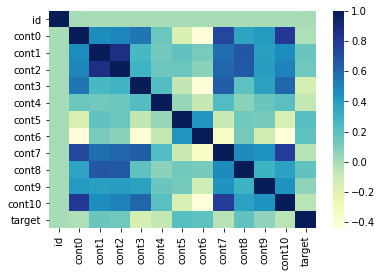

In [21]:
# Heatmap
corr = data.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap= "YlGnBu")

<AxesSubplot:xlabel='target', ylabel='Count'>

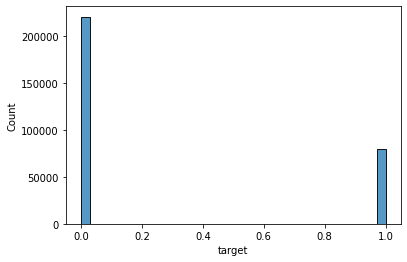

In [22]:
sns.histplot(y) #imbalanced, so i shouldnt use accuracy[[TN,FP], [FN,TP]], F1 identifies 1, & w/o wrong ones

### Correlation features removed 

<AxesSubplot:>

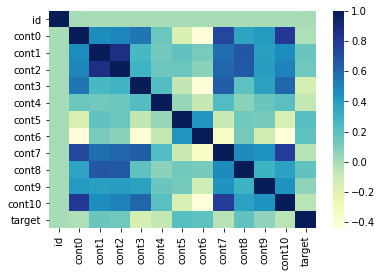

In [23]:
corr = data.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap= "YlGnBu")

In [24]:
X = X.drop(columns=['cont2','cont7','cont10','id'])

In [25]:
X.shape

(300000, 27)

In [26]:
num_cols = X._get_numeric_data().columns

## Balancing with SMOTE

## Preprocessing

In [27]:
X

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cat17,cat18,cont0,cont1,cont3,cont4,cont5,cont6,cont8,cont9
0,A,I,A,B,B,BI,A,S,Q,A,...,D,B,0.629858,0.855349,0.795549,0.681917,0.621672,0.592184,0.815254,0.965006
1,A,I,A,A,E,BI,K,W,AD,F,...,D,B,0.370727,0.328929,0.541366,0.388982,0.357778,0.600044,0.399353,0.927406
2,A,K,A,A,E,BI,A,E,BM,L,...,D,B,0.502272,0.322749,0.616352,0.793687,0.552877,0.352113,0.412303,0.292696
3,A,K,A,C,E,BI,A,Y,AD,F,...,D,B,0.934242,0.707663,0.807807,0.800032,0.619147,0.221789,0.633669,0.760318
4,A,I,G,B,E,BI,C,G,Q,A,...,D,B,0.254427,0.274514,0.277308,0.610578,0.128291,0.578764,0.351103,0.357084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,A,N,F,A,E,BU,A,AS,K,A,...,D,B,0.681700,0.500730,0.671927,0.390566,0.145840,0.262767,0.519340,0.617436
299996,A,K,A,A,G,BI,A,K,AE,E,...,D,B,0.489226,0.790664,0.620356,0.384891,0.735879,0.547731,0.470575,0.275743
299997,A,G,M,A,H,BI,C,L,F,A,...,D,D,0.487882,0.522347,0.232436,0.832482,0.810663,0.596939,0.373997,0.518024
299998,B,H,A,D,B,BI,A,AA,AX,A,...,D,A,0.331900,0.812891,0.630708,0.346898,0.735147,0.563488,0.680430,0.318453


In [28]:
from sklearn.preprocessing import OneHotEncoder

In [29]:
X[cat_cols]

,cat5,cat13,cat8,cat14,cat11,cat18,cat3,cat15,cat10,cat4,cat9,cat16,cat1,cat6,cat0,cat12,cat17,cat7,cat2
0,BI,A,Q,A,A,B,B,B,LO,B,A,D,I,A,A,A,D,S,A
1,BI,A,AD,B,A,B,A,D,HJ,E,F,B,I,K,A,B,D,W,A
2,BI,A,BM,A,A,B,A,B,DJ,E,L,D,K,A,A,B,D,E,A
3,BI,A,AD,A,A,B,C,B,KV,E,F,D,K,A,A,A,D,Y,A
4,BI,A,Q,B,A,B,B,B,DP,E,A,B,I,C,A,A,D,G,G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,BU,A,K,B,A,B,A,D,HG,E,A,B,N,A,A,A,D,AS,F
299996,BI,A,AE,B,A,B,A,B,HK,G,E,D,K,A,A,B,D,K,A
299997,BI,A,F,B,B,D,A,D,HC,H,A,B,G,C,A,A,D,L,M
299998,BI,A,AX,A,A,A,D,B,BF,B,A,A,H,A,B,A,D,AA,A


In [30]:
# Encode categorical variables
def one_hot_encoding(X):
    ohe = OneHotEncoder(handle_unknown='ignore')
    ohe.fit(X[cat_cols])
    return pd.DataFrame(ohe.transform(X).toarray())

In [31]:
X_cat_ohe = one_hot_encoding(X[cat_cols])

In [32]:
X_cat_ohe

,0,1,2,3,4,5,6,7,8,9,...,613,614,615,616,617,618,619,620,621,622
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
299996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
299997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
299998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
new_X = X_cat_ohe.join(X[num_cols])

In [34]:
new_X

,0,1,2,3,4,5,6,7,8,9,...,621,622,cont0,cont1,cont3,cont4,cont5,cont6,cont8,cont9
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.629858,0.855349,0.795549,0.681917,0.621672,0.592184,0.815254,0.965006
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.370727,0.328929,0.541366,0.388982,0.357778,0.600044,0.399353,0.927406
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.502272,0.322749,0.616352,0.793687,0.552877,0.352113,0.412303,0.292696
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.934242,0.707663,0.807807,0.800032,0.619147,0.221789,0.633669,0.760318
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.254427,0.274514,0.277308,0.610578,0.128291,0.578764,0.351103,0.357084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.681700,0.500730,0.671927,0.390566,0.145840,0.262767,0.519340,0.617436
299996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.489226,0.790664,0.620356,0.384891,0.735879,0.547731,0.470575,0.275743
299997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.487882,0.522347,0.232436,0.832482,0.810663,0.596939,0.373997,0.518024
299998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.331900,0.812891,0.630708,0.346898,0.735147,0.563488,0.680430,0.318453


## Baseline Model 

In [35]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression # explicit class import from module
from sklearn.model_selection import GridSearchCV

In [36]:
model = LogisticRegression(max_iter=1000)

In [37]:
X = new_X

In [38]:
from sklearn.model_selection import cross_val_score 

cv_results = cross_validate(model, X, y, cv=3)

In [39]:
cv_results

{'fit_time': array([ 92.95678234,  98.1558466 , 102.89804268]),
 'score_time': array([0.11277485, 0.16210485, 0.15996099]),
 'test_score': array([0.8448 , 0.84278, 0.84523])}

In [40]:
cv_results['test_score'].mean()

0.84427

### Finding F1 score

In [ ]:
### removed cross_val

## Feature permutation

In [ ]:
from sklearn.inspection import permutation_importance

log_model = LogisticRegression().fit(X, y) # Fit model

permutation_score = permutation_importance(log_model, X, y, n_repeats=100) # Perform Permutation

importance_df = pd.DataFrame(np.vstack((X.columns,
                                        permutation_score.importances_mean)).T) # Unstack results
importance_df.columns=['feature','score decrease']

importance_df.sort_values(by="score decrease", ascending = False) # Order by importance

In [ ]:
X = X.drop(columns=['WHATEVER COLUMNS']) # Drops weak features

log_reg = LogisticRegression()

scores = cross_val_score(log_reg, X, y, cv=10)

scores.mean()

# Modeling

## XGBoost

In [ ]:
import xgboost as xgb

model=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
model.fit(X_train, y_train)
model.score(X_test,y_test)

In [ ]:
model.score(X_test,y_test)

In [ ]:
!pip install xgboost

In [ ]:
data_test = pd.read_csv('raw_data/test.csv')

## SGDClassifier

In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
model=SGDClassifier()

In [ ]:
cv_result=cross_validate(model, new_data, y, cv=5) 

In [ ]:
cv_result['test_score'].mean()

In [ ]:
cross_val_score(model, new_data, y, scoring="f1", cv = 7).mean()

## Test Set

In [ ]:
test_enc=ohe.transform(data_test[cat_cols]).toarray()
data_test[cat_cols]=test_enc
model.predict(test)